<a href="https://colab.research.google.com/github/swarnava-96/DNA-Sequence-Cassifier-using-NLP/blob/main/DNA_Sequence_Classifier_on_Chimpanzee_Genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DNA Sequence Classifier using NLP**
In this project, we will apply a Machine Learning Classification model on chimpanzee gene sequences dataset that can predict genes function based on DNA sequence (coding sequence) alone.

### Importing the necessary libraries

In [1]:
cd "/content/drive/MyDrive/Datasets"

/content/drive/MyDrive/Datasets


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the Data

In [27]:
chimp_data = pd.read_table("chimp_data.txt")
chimp_data.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [29]:
# Lets see the shape of the data

chimp_data.shape

(1682, 2)

We have some data for chimpanzee DNA sequence coding regions and a class label. 
Let's define a function to collect all possible overlapping k-mers of a specified length from any sequence string. We will basically apply the k-mers to the complete sequences.

In [30]:
# Lets create a function to convert sequence strings into k-mer words, default size = 6 (Hexamer words)

def getKmers(sequence, size = 6):
  return [sequence[x : x + size].lower() for x in range(len(sequence) - size + 1)]

Now we can convert our training data sequences into short overlapping k-mers of legth 6.

In [31]:
chimp_data["words"] = chimp_data.apply(lambda x : getKmers(x["sequence"]), axis = 1)
chimp_data  = chimp_data.drop("sequence", axis = 1)

Now, our coding sequence data is changed to lowercase, split up into all possible k-mer words of length 6 and ready for the next step. Let's take a look.

In [32]:
chimp_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
3,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
4,6,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."


Since we are going to use scikit-learn natural language processing tools to do the k-mer counting, we need to now convert the lists of k-mers for each gene into string sentences of words that the count vectorizer can use. We can also make a y variable to hold the class labels.

In [33]:
chimp_texts = list(chimp_data["words"])
for item in range(len(chimp_texts)):
  chimp_texts[item] = " ".join(chimp_texts[item])

# Lets create our target feature
y_data = chimp_data.iloc[:, 0].values

In [34]:
# Lets check

print(chimp_texts[2])

atggcc tggcct ggcctc gcctcg cctcgc ctcgcg tcgcgc cgcgct gcgctg cgctgg gctggt ctggtg tggtgg ggtggc gtggcg tggcgg ggcggt gcggtg cggtgg ggtggc gtggcg tggcga ggcgac gcgacg cgacgc gacgcg acgcgg cgcggc gcggct cggctg ggctgc gctgct ctgctc tgctcc gctcct ctcctg tcctgg cctgga ctggag tggagg ggaggc gaggcc aggccg ggccgg gccggc ccggcg cggcgg ggcggc gcggcg cggcgc ggcgcg gcgcgg cgcgga gcggag cggagc ggagct gagctc agctcc gctccg ctccgg tccggg ccgggc cgggcc gggccc ggcccg gcccgg cccggc ccggct cggctc ggctcc gctccc ctcccc tcccca ccccag cccagg ccaggc caggcc aggccg ggccgt gccgtg ccgtgc cgtgcg gtgcgg tgcggg gcggga cgggac gggacc ggaccg gaccgt accgtc ccgtcg cgtcgg gtcggg tcgggg cggggc ggggcc gggccg ggccga gccgag ccgagc cgagcg gagcgc agcgcc gcgccg cgccgc gccgct ccgctg cgctgc gctgcc ctgccg tgccga gccgac ccgacg cgacgt gacgtc acgtcc cgtccg gtccgc tccgcg ccgcgc cgcgcg gcgcgc cgcgca gcgcag cgcagg gcaggt caggtt aggttc ggttca gttcat ttcata tcatag catagg ataggc taggcg aggcgg ggcgga gcggaa cggaag ggaagg gaaggg aaggga agggac

In [35]:
y_data

array([4, 4, 4, ..., 6, 3, 3])

Now, we will apply the BAG of WORDS using CountVectorizer. This is equivalent to k-mer counting. The n-gram size of 4 was previously determined by testing

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (4,4))
X = cv.fit_transform(chimp_texts)

In [37]:
# Lets see the shape of the vector X

X.shape

(1682, 229684)

If we have a look at class balance we can see we have relatively balanced dataset.

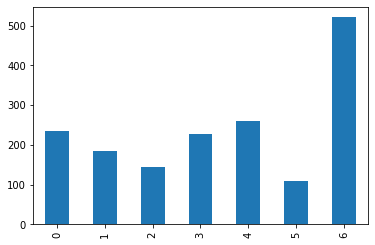

In [38]:
chimp_data["class"].value_counts().sort_index().plot.bar();

In [39]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size = 0.20, random_state = 42)

In [40]:
# Lets see the shape of the train and test datasets
print(X_train.shape)
print(X_test.shape)

(1345, 229684)
(337, 229684)


A multinomial naive Bayes classifier will be created. I previously did some parameter tuning and found the ngram size of 4 (reflected in the Countvectorizer() instance) and a model alpha of 0.1 did the best.

In [41]:
from sklearn.naive_bayes import  MultinomialNB
classifier = MultinomialNB(alpha = 0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [42]:
# Prediction

y_pred = classifier.predict(X_test)

Okay, so let's look at some model performce metrics like the confusion matrix, accuracy, precision, recall and f1 score. We are getting really good results on our unseen data, so it looks like our model did not overfit to the training data.

In [43]:
# Validation

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion Matrix\n")
print(pd.crosstab(pd.Series(y_test, name = "Actual"), pd.Series(y_pred, name = "Predicted")))
def get_metrics(y_test, y_predicted):
  accuracy = accuracy_score(y_test, y_predicted)
  precision = precision_score(y_test, y_predicted, average = "weighted")
  recall = recall_score(y_test, y_predicted, average = "weighted")
  f1 = f1_score(y_test, y_predicted, average = "weighted")

  return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion Matrix

Predicted   0   1   2   3   4   5    6
Actual                                
0          27   0   0   0   0   0    1
1           0  38   0   0   0   0    1
2           0   0  25   0   0   0    2
3           0   0   0  41   0   0    2
4           2   1   0   3  40   0    6
5           3   0   0   0   3  19    4
6           0   0   0   1   0   0  118
accuracy = 0.914 
precision = 0.920 
recall = 0.914 
f1 = 0.911


We can conclude that the model performed really well from the above metrics scores.